# MVA - Kernel Methods - Data Challenge

In [1]:
from os.path import exists
import numpy as np
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import optimize
import seaborn as sns

# from skimage.draw import line

Xtr = np.array(pd.read_csv('./data/Xtr.csv',header=None,sep=',',usecols=range(3072)))[:100]
Xte = np.array(pd.read_csv('./data/Xte.csv',header=None,sep=',',usecols=range(3072)))[:100]
Ytr = np.array(pd.read_csv('./data/Ytr.csv',sep=',',usecols=[1])).squeeze()[:100]

### Image processing

In [2]:
def row_to_img (row, rescale = False, grayscale = False) : 
    # Convert a row of shape 3072 to an image 32 x 32 x 3 or 32 x 32
    # if rescale == True, put pixel values between 0 and 1 :
    img = np.moveaxis(row.reshape(3,32,32),0,-1)
    if grayscale : 
      img = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114* img[:,:,2]
    if rescale : 
      img = (img - img.min()) / (img.max() - img.min())
    return img

def img_to_row (img, grayscale = False) : 
    # Convert an image of shape 32x32 or 32x32x3 into a row of shape 1024 or 3072
    if not(grayscale) : 
        img = np.moveaxis(img,-1,0)
    return img.ravel()

def row_to_flipped_row (row) : 
    # Convert a row of an image into the row of the horizontally flipped image (with images in RGB !)
    img = row_to_img(row)

    img_flipped = np.zeros(img.shape)
    for i in range(3) : 
        img_flipped[:,:,i] = img[:,::-1,i]
    
    return img_to_row(img_flipped)

def row_to_gray_row (row) : 
    # Convert a row of shape 3072 to the row of a grayscale image of shape 1024
    img = np.moveaxis(row.reshape(3,32,32),0,-1)
    gray_img = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114* img[:,:,2]
    gray_row = np.ravel(gray_img)
    return gray_row

def augmented_dataset(X, y):
    return np.concatenate([X, np.apply_along_axis(row_to_flipped_row, axis=1, arr=X)]), np.concatenate([y, y])

def plot_random_images (X, Y, grayscale = False, nb_images=3) : 
    fig, ax = plt.subplots(nb_images,10, figsize=(50,5*nb_images))

    classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]

    for axi, c in zip(ax[0], np.arange(10)):
        axi.set_title(f'Category {c} : {classes[c]}',fontsize=26)
    fig.tight_layout()

    for c in range(10) : 
        # Selection of nb_images random images of class c+1 in Xtr :
        Y_c = np.argwhere(Y==c).reshape(-1)
        random_indices = np.random.choice(Y_c, size=nb_images, replace=False)

        for k,i in enumerate(random_indices) : 
            img = row_to_img(X[i], rescale=True, grayscale = grayscale)
            cmap = 'gray' if grayscale else None
            ax[k,c].imshow(img, cmap = cmap)

    plt.show()

## Grayscale Dataset

In [3]:
Xtr_grs = np.apply_along_axis(row_to_gray_row, axis=1, arr=Xtr)
Xte_grs = np.apply_along_axis(row_to_gray_row, axis=1, arr=Xte)

### Visualization

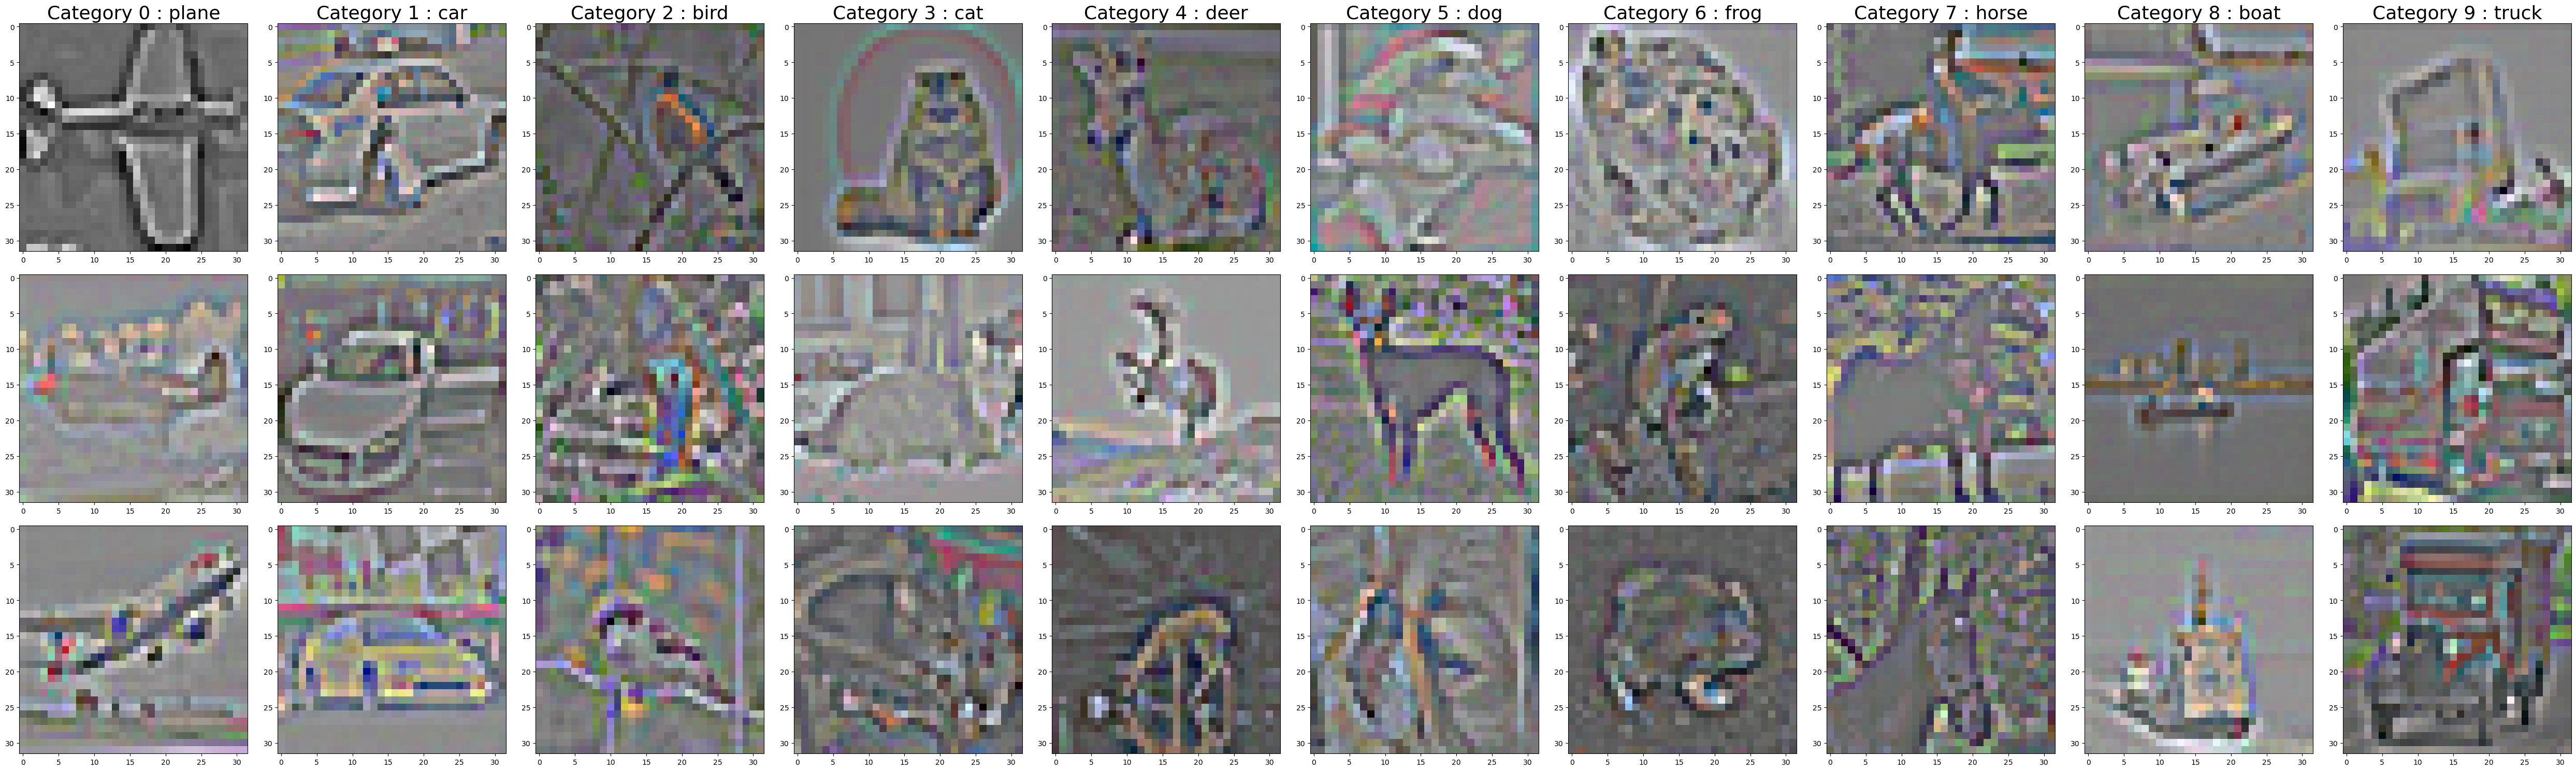

In [4]:
plot_random_images(Xtr, Ytr)

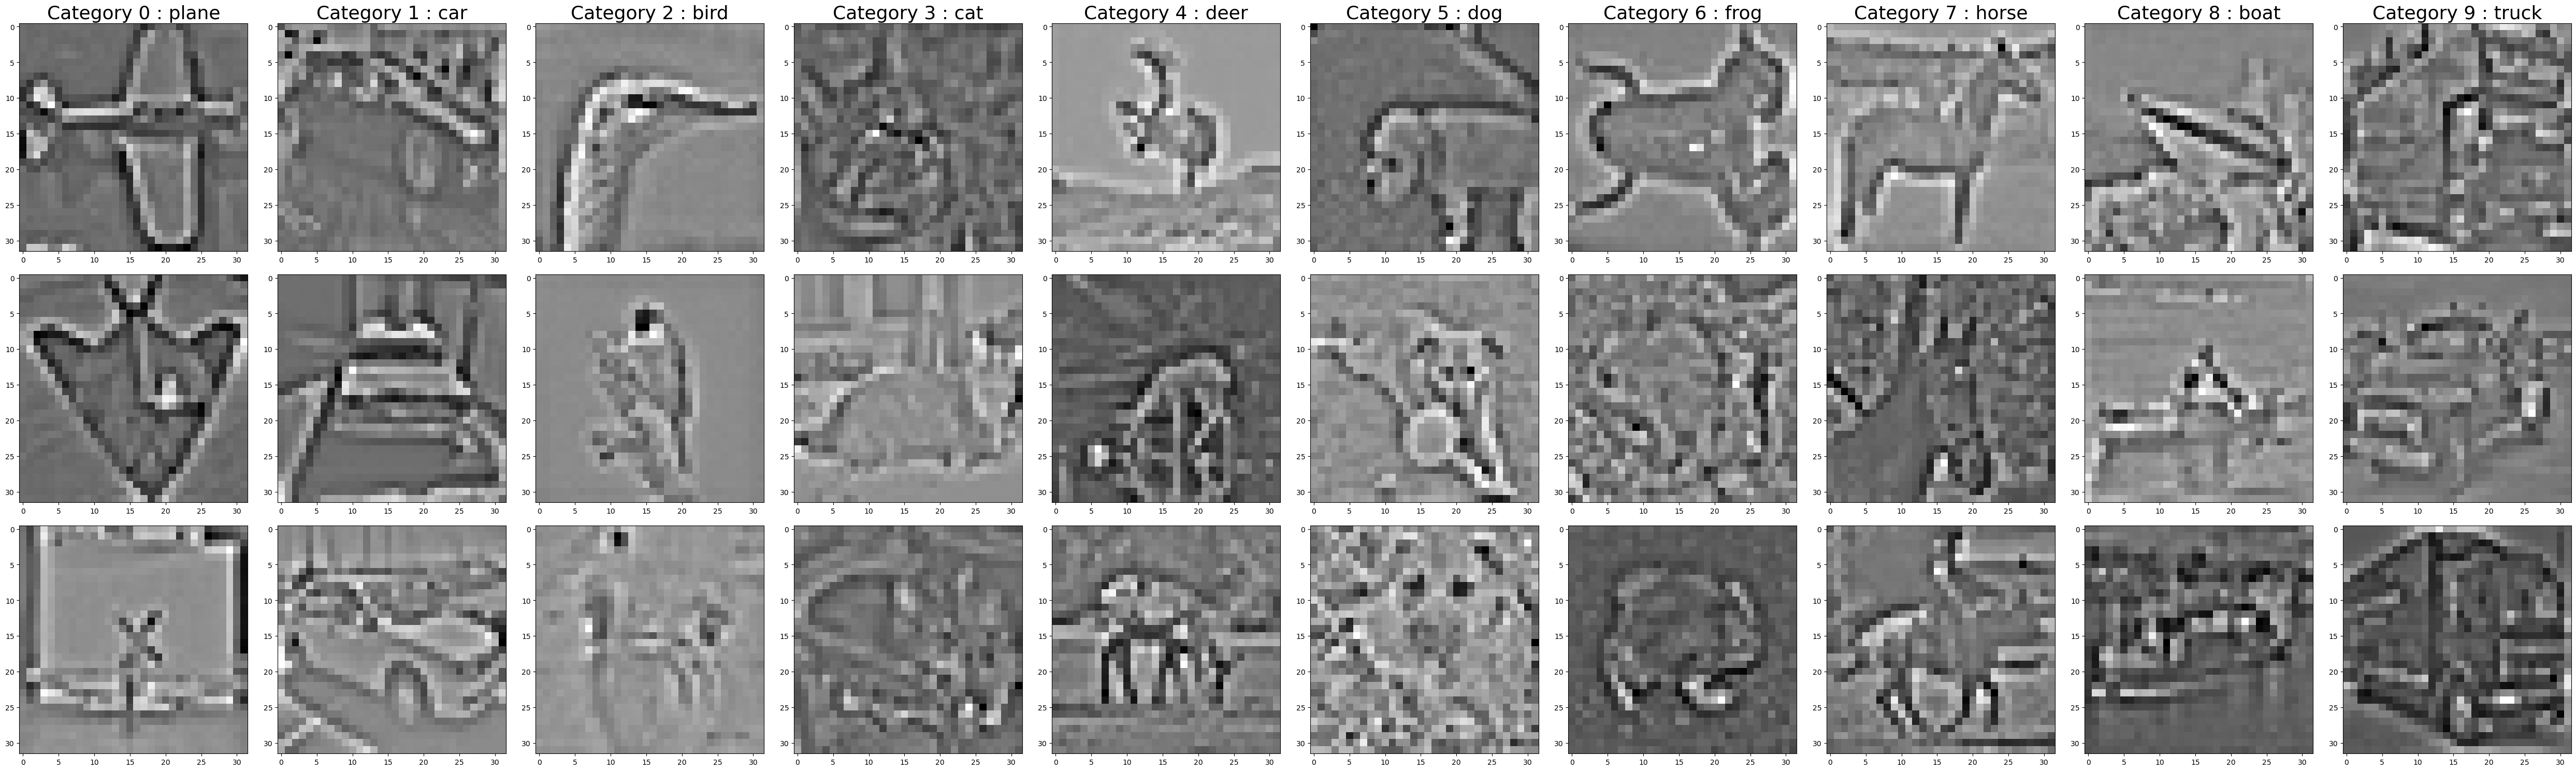

In [5]:
plot_random_images(Xtr, Ytr, grayscale = True)